In [170]:
# core
import sys
import time

# custom
sys.path.append('../code/poloniex')
sys.path.append('../code')
import polo_eda as pe
import calc_TA_sigs as cts
import data_processing as dp

# installed
import pandas as pd
import numpy as np
import statsmodels.api as sm
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.regularizers import l1_l2
import keras.backend as K
from sklearn.preprocessing import StandardScaler as SS

# plotting
import plotly
plotly.offline.init_notebook_mode()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout, Candlestick
from plotly.tools import FigureFactory as FF
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pe.read_trade_hist('BTC_STR')

In [3]:
# resamples to the hour
rs_full = dp.resample_ohlc(df, resamp='H')

In [4]:
rs_full = dp.make_mva_features(rs_full)

In [5]:
bars = cts.create_tas(bars=rs_full, verbose=True)

using multiplier of 1000000


In [9]:
indicators = ['bband_u_cl', # bollinger bands
             'bband_m_cl',
             'bband_l_cl',
             'bband_u_tp',
             'bband_m_tp',
             'bband_l_tp',
             'bband_u_cl_diff',
             'bband_m_cl_diff',
             'bband_l_cl_diff',
             'bband_u_cl_diff_hi',
             'bband_l_cl_diff_lo',
             'bband_u_tp_diff',
             'bband_m_tp_diff',
             'bband_l_tp_diff',
             'bband_u_tp_diff_hi',
             'bband_l_tp_diff_lo',
             'dema_cl',
             'dema_tp',
             'dema_cl_diff',
             'dema_tp_diff',
             'ema_cl',
             'ema_tp',
             'ema_cl_diff',
             'ema_tp_diff',
             'ht_tl_cl',
             'ht_tl_tp',
             'ht_tl_cl_diff',
             'ht_tl_tp_diff',
             'kama_cl',
             'kama_tp',
             'kama_cl_diff',
             'kama_tp_diff',
            #  'mama_cl',  # having problems with these
            #  'mama_tp',
            #  'fama_cl',
            #  'fama_tp',
            #  'mama_cl_osc',
            #  'mama_tp_osc',
             'midp_cl',
             'midp_tp',
             'midp_cl_diff',
             'midp_tp_diff',
             'midpr',
             'midpr_diff',
             'sar',
             'sar_diff',
             'tema_cl',
             'tema_tp',
             'tema_cl_diff',
             'tema_tp_diff',
             'trima_cl',
             'trima_tp',
             'trima_cl_diff',
             'trima_tp_diff',
             'wma_cl',
             'wma_tp',
             'wma_cl_diff',
             'wma_tp_diff',
             'adx',
             'adxr',
             'apo_cl',
             'apo_tp',
             'arup', # aroon
             'ardn',
             'aroonosc',
             'bop',
             'cci',
             'cmo_cl',
             'cmo_tp',
             'dx',
             'macd_cl',
             'macdsignal_cl',
             'macdhist_cl',
             'macd_tp',
             'macdsignal_tp',
             'macdhist_tp',
             'mfi',
             'mdi',
             'mdm',
             'mom_cl',
             'mom_tp',
             'pldi',
             'pldm',
             'ppo_cl',
             'ppo_tp',
             'roc_cl',
             'roc_tp',
             'rocp_cl',
             'rocp_tp',
             'rocr_cl',
             'rocr_tp',
             'rocr_cl_100',
             'rocr_tp_100',
             'rsi_cl',
             'rsi_tp',
             'slowk', # stochastic oscillator
             'slowd',
             'fastk',
             'fastd',
             'strsi_cl_k',
             'strsi_cl_d',
             'strsi_tp_k',
             'strsi_tp_d',
             'trix_cl',
             'trix_tp',
             'ultosc',
             'willr',
             'ad',
             'adosc',
             'obv_cl',
             'obv_tp',
             'atr',
             'natr',
             'trange',
             'ht_dcp_cl',
             'ht_dcp_tp',
             'ht_dcph_cl',
             'ht_dcph_tp',
             'ht_ph_cl',
             'ht_ph_tp',
             'ht_q_cl',
             'ht_q_tp',
             'ht_s_cl',
             'ht_s_tp',
             'ht_ls_cl',
             'ht_ls_tp',
             'ht_tr_cl',
             'ht_tr_tp'
             ]

In [206]:
lin_inds = ['bband_m_cl_diff',
            'bband_m_tp_diff',
            'dema_cl_diff',
            'dema_tp_diff',
            'ema_cl_diff',
            'ema_tp_diff',
            'kama_cl_diff',
            'kama_tp_diff',
            'ht_tl_cl_diff',
            'ht_tl_tp_diff',
            'kama_cl_diff',
            'kama_tp_diff',
            'midp_cl_diff',
            'midp_tp_diff',
            'midpr_diff',
            'sar_diff',
            'tema_cl_diff',
            'tema_tp_diff',
            'trima_cl_diff',
            'trima_tp_diff',
            'wma_cl_diff',
            'wma_tp_diff',
            'apo_cl',
            'apo_tp',
            'cci',
            'cmo_cl',
            'cmo_tp',
            'macdhist_cl',
            'macdhist_tp',
            'mom_cl',
            'mom_tp',
            'ppo_cl',
            'ppo_tp',
            'roc_cl',
            'roc_tp',
            'rocp_cl',
            'rocp_tp',
            'rocr_cl',
            'rocr_tp',
            'rocr_cl_100',
            'rocr_tp_100',
            'rsi_cl',
            'rsi_tp',
            'ht_ph_cl',
            'ht_ph_tp']
# others that are bound to a range, not price data
other_inds = ['adx',
                'adxr',
                'arup', # aroon
                'ardn',
                'aroonosc',
                'bop',
                'dx',
                'macd_cl',
                'macdsignal_cl',
                'macd_tp',
                'macdsignal_tp',
                'mfi',
                'mdi',
                'mdm',
                'pldi',
                'pldm',
                'slowk', # stochastic oscillator
                'slowd',
                'fastk',
                'fastd',
                'strsi_cl_k',
                'strsi_cl_d',
                'strsi_tp_k',
                'strsi_tp_d',
                'trix_cl',
                'trix_tp',
                'ultosc',
                'willr',
                'ad',
                'adosc',
                'obv_cl',
                'obv_tp',
                'atr',
                'natr',
                'trange',
                'ht_dcp_cl',
                'ht_dcp_tp',
                'ht_dcph_cl',
                'ht_dcph_tp',
                'ht_q_cl',
                'ht_q_tp',
                'ht_s_cl',
                'ht_s_tp',
                'ht_ls_cl',
                'ht_ls_tp',
                'ht_tr_cl',
                'ht_tr_tp']

In [210]:
# make target columns
col = '24h_price_diff'
bars[col] = bars['typical_price'].copy()
bars[col] = np.hstack((np.repeat(bars[col].iloc[24], 24), bars['typical_price'].iloc[24:].values - bars['typical_price'].iloc[:-24].values))
bars['24h_price_diff_pct'] = bars[col] / np.hstack((np.repeat(bars['typical_price'].iloc[24], 24), bars['typical_price'].iloc[24:].values))

In [211]:
# drop first 24 points
bars = bars.iloc[24:]
# also drop first 1000 points because usually they are bogus
bars = bars.iloc[1000:]

In [273]:
feat_cols_full = indicators + ['mva_tp_24_diff', 'direction_volume', 'volume']
feat_cols = lin_inds + other_inds + ['mva_tp_24_diff', 'direction_volume', 'volume']
feat_cols = indicators + ['mva_tp_24_diff', 'direction_volume', 'volume']
features = bars[feat_cols].values

In [274]:
set(feat_cols_full).difference(set(feat_cols))

set()

In [275]:
features.shape

(25723, 125)

In [276]:
targets = bars['24h_price_diff_pct'].values

In [277]:
targets.shape

(25723,)

In [278]:
train_feats = features[:-5000]
train_targs = targets[:-5000]
test_feats = features[-5000:]
test_targs = targets[-5000:]

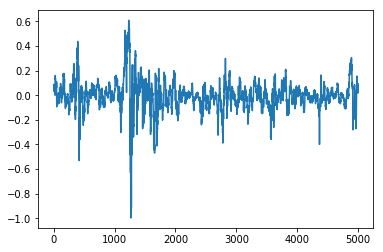

In [279]:
plt.plot(test_targs)

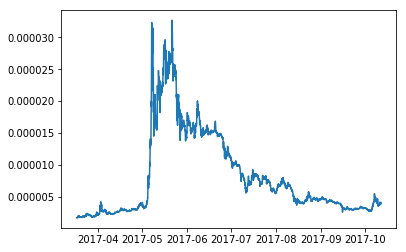

In [280]:
plt.plot(bars['typical_price'].iloc[-5000:])

first net tried was 

```python
inputs = Input(shape=(125,))
x = Dense(128, activation='elu')(inputs)
x = Dense(64, activation='elu')(x)
predictions = Dense(1, activation='linear')(x)
```

with the indicators and ['mva_tp_24_diff', 'direction_volume']

however it was overfitting, a histogram of the weights showed some very large outliers

adding 0.5 dropout after both dense layers helped a lot.  Loss at about 0.002

adding batchnorm after the dense layers improved loss to about 0.0012 for train, but 0.241 for val.  Some big outliers

```python
inputs = Input(shape=(125,))
x = Dense(128, activation='elu')(inputs)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='linear')(x)
```

adding kernel regularizers with l1_l2 seemed to help, but had to use very small values.  adding activation regs didn't seem to help with l1_l2, no matter how small the values

this model seemed to work ok on future predictions, but still had a lot of really large positive predictions, when the actual was all over the place

```python
inputs = Input(shape=(125,))
x = Dense(512, activation='elu', kernel_regularizer=l1_l2(1e-6))(inputs)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='elu', kernel_regularizer=l1_l2(1e-8))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='elu', kernel_regularizer=l1_l2(1e-8))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='elu', kernel_regularizer=l1_l2(1e-8))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='linear')(x)
```

whoops!  forgot to normalize the input to a consistent range.  After doing that, didn't seem to actually help much

tried this model without using MVA-type indicators, didn't seem to work well
```python
inputs = Input(shape=(95,))
x = Dense(512, activation='elu')(inputs)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dense(64, activation='elu')(x)
x = BatchNormalization()(x)
x = Dense(16, activation='elu')(x)
x = BatchNormalization()(x)
predictions = Dense(1, activation='linear')(x)
```

next thing to try: make groups of time periods and normalize prices/mvas within those ranges, use the ranges as batches to train on

also add historical (like last 48h) of each kind of indicator

without normalizing as is, seems to do ok.  After normalizing, doesn't do well

In [281]:
scalers = []
xform_train = []
xform_test = []
for i, f in enumerate(feat_cols):
    s = SS()
    scalers.append(s)
    xform_train.append(s.fit_transform(train_feats[:, i].reshape(-1, 1))[:, 0])
    xform_test.append(s.transform(test_feats[:, i].reshape(-1, 1))[:, 0])
    
    
xform_train = np.array(xform_train).reshape(train_feats.shape[0], train_feats.shape[1])
xform_test = np.array(xform_test).reshape(test_feats.shape[0], test_feats.shape[1])

In [283]:
# restart keras session (clear weights)
K.clear_session()
# neural network basic model
inputs = Input(shape=(125,))
x = Dense(512, activation='elu')(inputs)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dense(64, activation='elu')(x)
x = BatchNormalization()(x)
x = Dense(16, activation='elu')(x)
x = BatchNormalization()(x)
predictions = Dense(1, activation='linear')(x)

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
cb = [es]

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='mean_squared_error')

In [284]:
model.fit(xform_train, train_targs, epochs=50, validation_split=0.1, callbacks=cb)

Train on 18650 samples, validate on 2073 samples
Epoch 1/50
18650/18650 [==============================] - 2s - loss: 0.0340 - val_loss: 0.0027
Epoch 2/50
18650/18650 [==============================] - 2s - loss: 0.0039 - val_loss: 0.0023
Epoch 3/50
18650/18650 [==============================] - 2s - loss: 0.0037 - val_loss: 0.0026
Epoch 4/50
18650/18650 [==============================] - 2s - loss: 0.0037 - val_loss: 0.0021
Epoch 5/50
18650/18650 [==============================] - 2s - loss: 0.0036 - val_loss: 0.0021
Epoch 6/50
18650/18650 [==============================] - 2s - loss: 0.0036 - val_loss: 0.0030
Epoch 7/50
18650/18650 [==============================] - 2s - loss: 0.0036 - val_loss: 0.0028
Epoch 8/50
18650/18650 [==============================] - 2s - loss: 0.0036 - val_loss: 0.0027
Epoch 9/50
18650/18650 [==============================] - 2s - loss: 0.0035 - val_loss: 0.0023
Epoch 10/50
18650/18650 [==============================] - 2s - loss: 0.0035 - val_loss: 0.0024


In [296]:
preds = model.predict(xform_train)[:, 0]
data = [Scatter(x=preds, y=train_targs, mode='markers', name='preds vs actual')]
layout = go.Layout(
    title='preds vs actual',
    xaxis=dict(
        title='predictions'
    ),
    yaxis=dict(
        title='actual'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='preds_vs_actual')

In [286]:
preds = model.predict(xform_test)[:, 0]
data = [Scatter(x=preds, y=test_targs, mode='markers', name='preds vs actual')]
layout = go.Layout(
    title='preds vs actual',
    xaxis=dict(
        title='predictions'
    ),
    yaxis=dict(
        title='actual'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='preds_vs_actual')

In [289]:
layers = model.layers

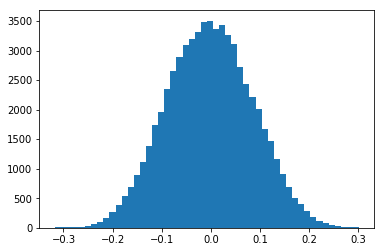

In [290]:
# dense 1
h = plt.hist(layers[1].get_weights()[0].flatten(), bins=50)

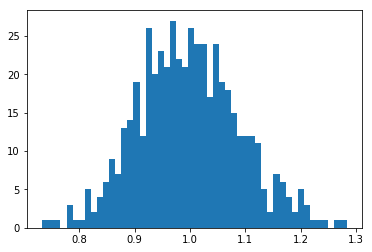

In [291]:
# batchnorm
h = plt.hist(layers[2].get_weights()[0].flatten(), bins=50)

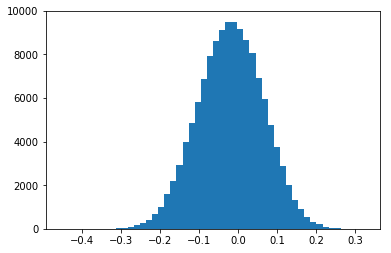

In [292]:
h = plt.hist(layers[4].get_weights()[0].flatten(), bins=50)

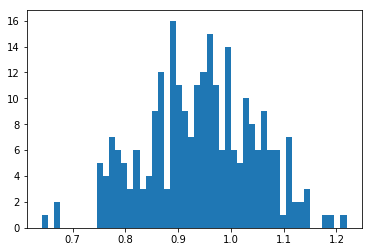

In [293]:
h = plt.hist(layers[5].get_weights()[0].flatten(), bins=50)

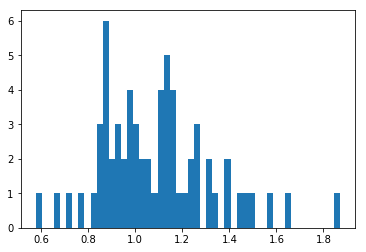

In [294]:
h = plt.hist(layers[7].get_weights()[0].flatten(), bins=50)

In [295]:
for l in layers:
    print(l.name)

input_1
dense_1
batch_normalization_1
dropout_1
dense_2
batch_normalization_2
dense_3
batch_normalization_3
dense_4
batch_normalization_4
dense_5
